In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [57]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [58]:
train.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


# Data Preprocessing and Visualization

In [59]:
train.isnull().sum()/train.shape[0] * 100

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

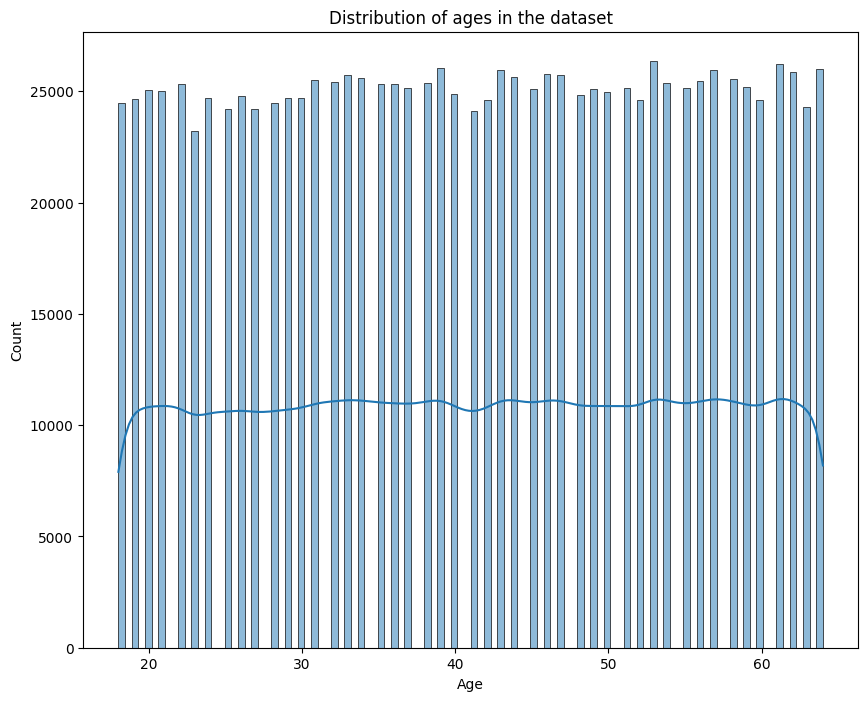

In [60]:
plt.figure(figsize=(10, 8))
sns.histplot(train, x="Age", kde=True)
plt.title("Distribution of ages in the dataset")
plt.show()

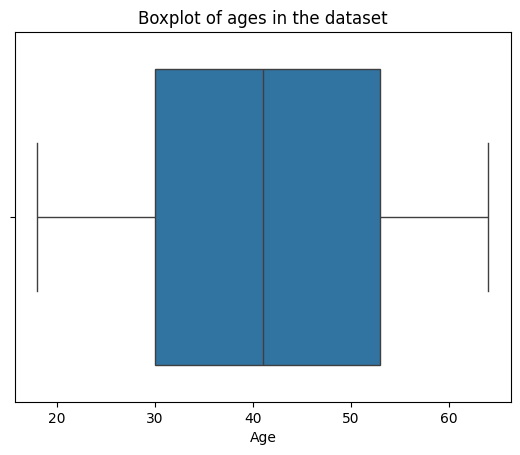

In [61]:
sns.boxplot(train, x="Age")
plt.title("Boxplot of ages in the dataset")
plt.show()

Looking at the diagrams the age seems to be evenly distributed.

Hence will be filled with the median values.

In [62]:
age_imputer = SimpleImputer(strategy="median")
train["Age"] = age_imputer.fit_transform(train[["Age"]])

In [63]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.500000,346410.305851,0.000000,299999.750000,599999.500000,899999.250000,1.199999e+06
Age,1200000.0,41.143294,13.434020,18.000000,30.000000,41.000000,53.000000,6.400000e+01
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,1.499970e+05
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,5.897591e+01
Previous Claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000e+00
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,1.900000e+01
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,8.490000e+02
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000e+00
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4.999000e+03


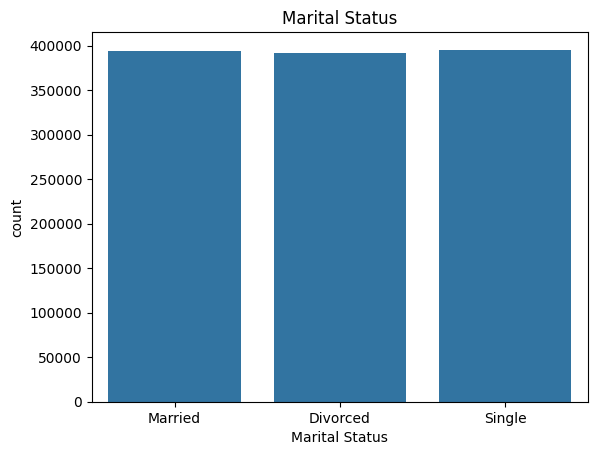

In [64]:
sns.countplot(train, x="Marital Status")
plt.title("Marital Status")
plt.show()

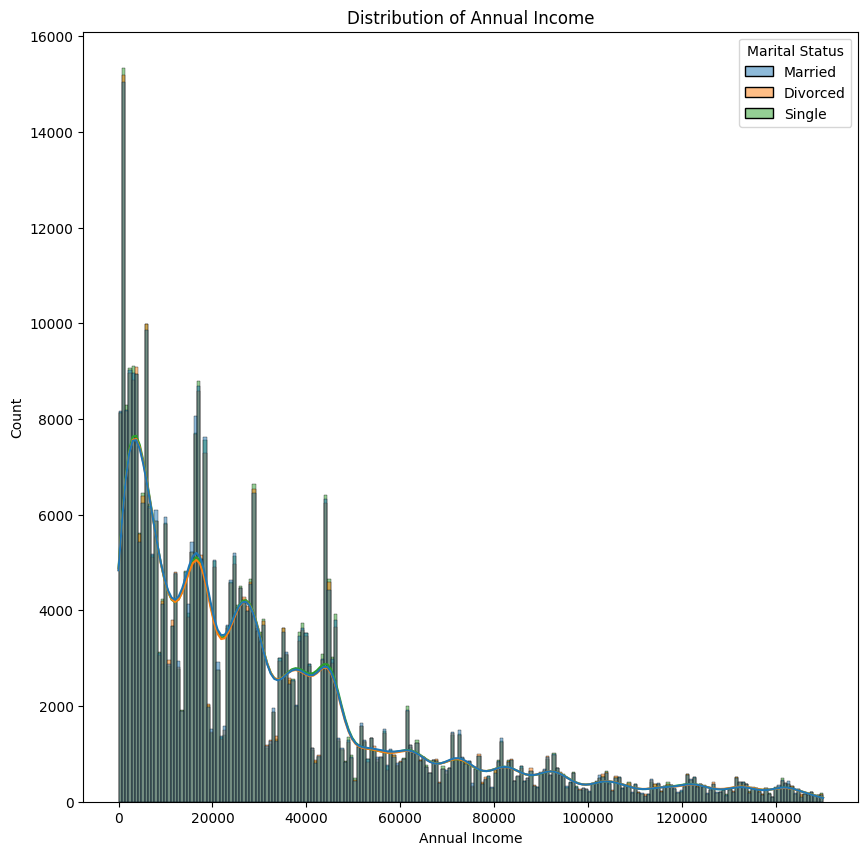

In [65]:
plt.figure(figsize=(10, 10))
sns.histplot(train, x="Annual Income", hue="Marital Status", kde=True)
plt.title("Distribution of Annual Income")
plt.show()

This shows that the distribution of the annual income is skewed to the right.

This means that a lot more people are in the lower ranges of income.

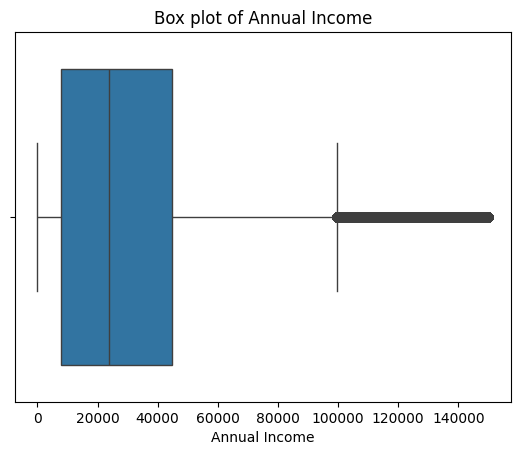

In [66]:
sns.boxplot(train, x="Annual Income")
plt.title("Box plot of Annual Income")
plt.show()

The data contains a lot of outliers when it comes to the annual salary. Though these outliers may be relevant and cannot just be dropped.

In [67]:
deviation = train["Annual Income"].std() * 3

In [68]:
train[train['Annual Income'].notna()]['Annual Income']

0           10049.0
1           31678.0
2           25602.0
3          141855.0
4           39651.0
             ...   
1199993      1607.0
1199994     23456.0
1199995     27316.0
1199996     35786.0
1199997     51884.0
Name: Annual Income, Length: 1155051, dtype: float64

In [69]:
print(f"The percentage of people with an annual income greater than {deviation} is (outliers) {(train[train['Annual Income'] >  deviation]['id'].count()/train.shape[0]) * 100}")

The percentage of people with an annual income greater than 96538.5183725381 is (outliers) 5.976583333333333


6% of the data can be considered outliers with regards to the `Annual Income` column. But these enteries cannot just be dropped without further investigation.

In [70]:
train["Education Level"].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

Later in encoding, the education level will be encoded to a numerical value that shows the order of classification. With `High School` being the lowest and `PhD` being the highest.

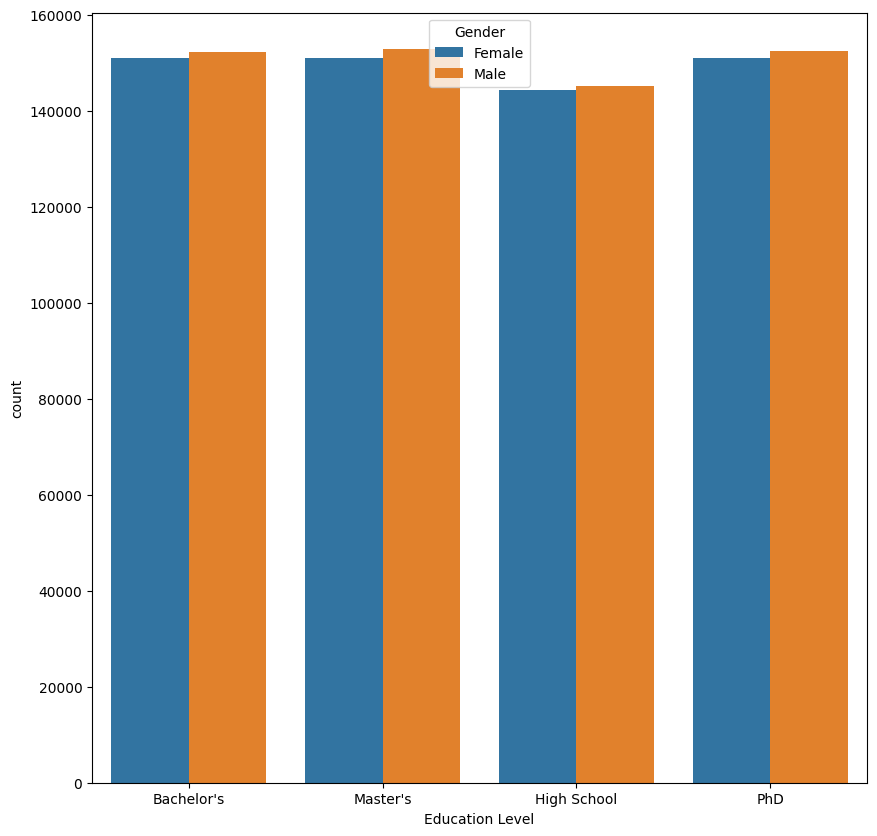

In [71]:
plt.figure(figsize=(10, 10))
sns.countplot(train, x="Education Level", hue="Gender")
plt.show()

In [72]:
corr = train[["Education Level", "Annual Income"]]
corr.head()

,Education Level,Annual Income
0,Bachelor's,10049.0
1,Master's,31678.0
2,High School,25602.0
3,Bachelor's,141855.0
4,Bachelor's,39651.0


In [73]:
corr["Education Level"] = corr["Education Level"].transform(lambda x: x.replace("High School", 1).replace("Bachelor's", 2).replace("Master's", 3).replace("PhD", 4).replace("Post-Graduate", "5"))

C:\Users\Philemon\AppData\Local\Temp\ipykernel_2692\3061962483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr["Education Level"] = corr["Education Level"].transform(lambda x: x.replace("High School", 1).replace("Bachelor's", 2).replace("Master's", 3).replace("PhD", 4).replace("Post-Graduate", "5"))
C:\Users\Philemon\AppData\Local\Temp\ipykernel_2692\3061962483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["Education Level"] = corr["Education Level"].transform(lambda x: x.replace("High School", 1).r

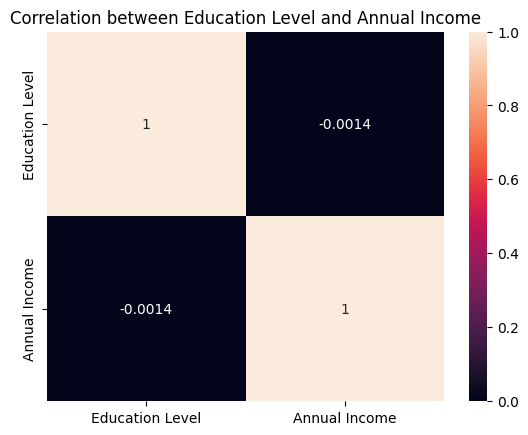

In [74]:
sns.heatmap(corr.corr(), annot=True)
plt.title("Correlation between Education Level and Annual Income")
plt.show()

This shows there's barely any correlation between education level and annual income. This is not surprising as the education level is not a factor that determines the annual income.

Removing outliers in `Annual Income` column in a new dataset 

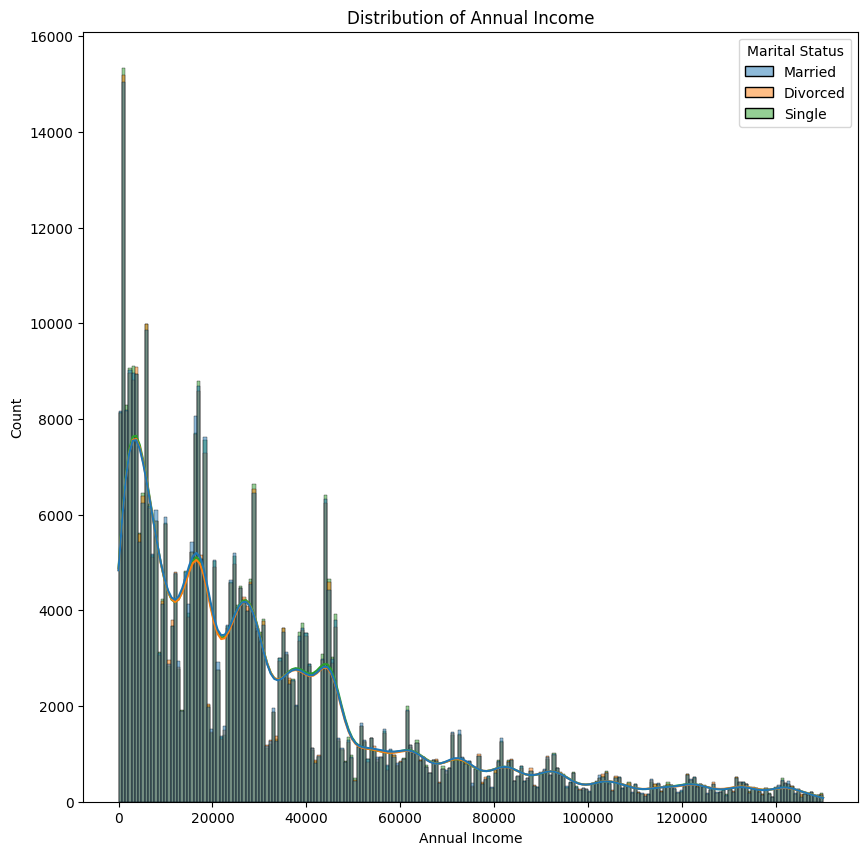

In [75]:
plt.figure(figsize=(10, 10))
sns.histplot(train, x="Annual Income", hue="Marital Status", kde=True)
plt.title("Distribution of Annual Income")
plt.show()

In [76]:
marital_mode = train["Marital Status"].mode()[0]
train["Marital Status"].fillna(marital_mode, inplace=True)

C:\Users\Philemon\AppData\Local\Temp\ipykernel_2692\2509113373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Marital Status"].fillna(marital_mode, inplace=True)


Looking at the instances in the dataframe that contain less than 10 null values, we can safely drop these tables since that dataset is large enough to cover for the loss.

In [77]:
train = train[train["Insurance Duration"].notna()]
train = train[train["Vehicle Age"].notna()]

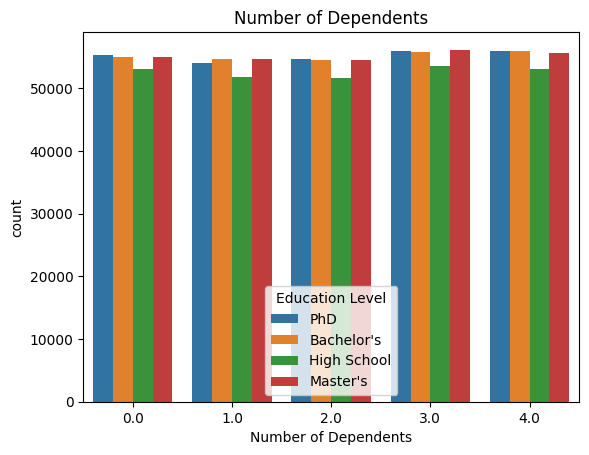

In [78]:
sns.countplot(train, x="Number of Dependents", hue="Education Level")
plt.title("Number of Dependents")
plt.legend(title="Education Level", loc="lower center")
plt.show()

This chart shows that high school graduates are less likely to have more dependents than those with a higher education level. This is likely due to the fact that high school graduates are more likely to be younger and have fewer years of experience, which may make it more difficult for them to support a family.

PhD holders on the other hand are more likely to have more dependents, which is likely due to the fact that they are more likely to be older and have more experience, which may make it easier for them to support a family.

In [79]:
train["Number of Dependents"].fillna(train["Number of Dependents"].median(), inplace=True)

C:\Users\Philemon\AppData\Local\Temp\ipykernel_2692\2694432713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Number of Dependents"].fillna(train["Number of Dependents"].median(), inplace=True)


Filled the `Number of Dependents` column with the median value since it is more or less a categorical column.

In [80]:
train["Occupation"].unique()

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

The `Occupation` column has a high percentage of missing values (about 30%), which is likely due to the fact that some people may not have reported their occupation or may have reported it as "unknown".

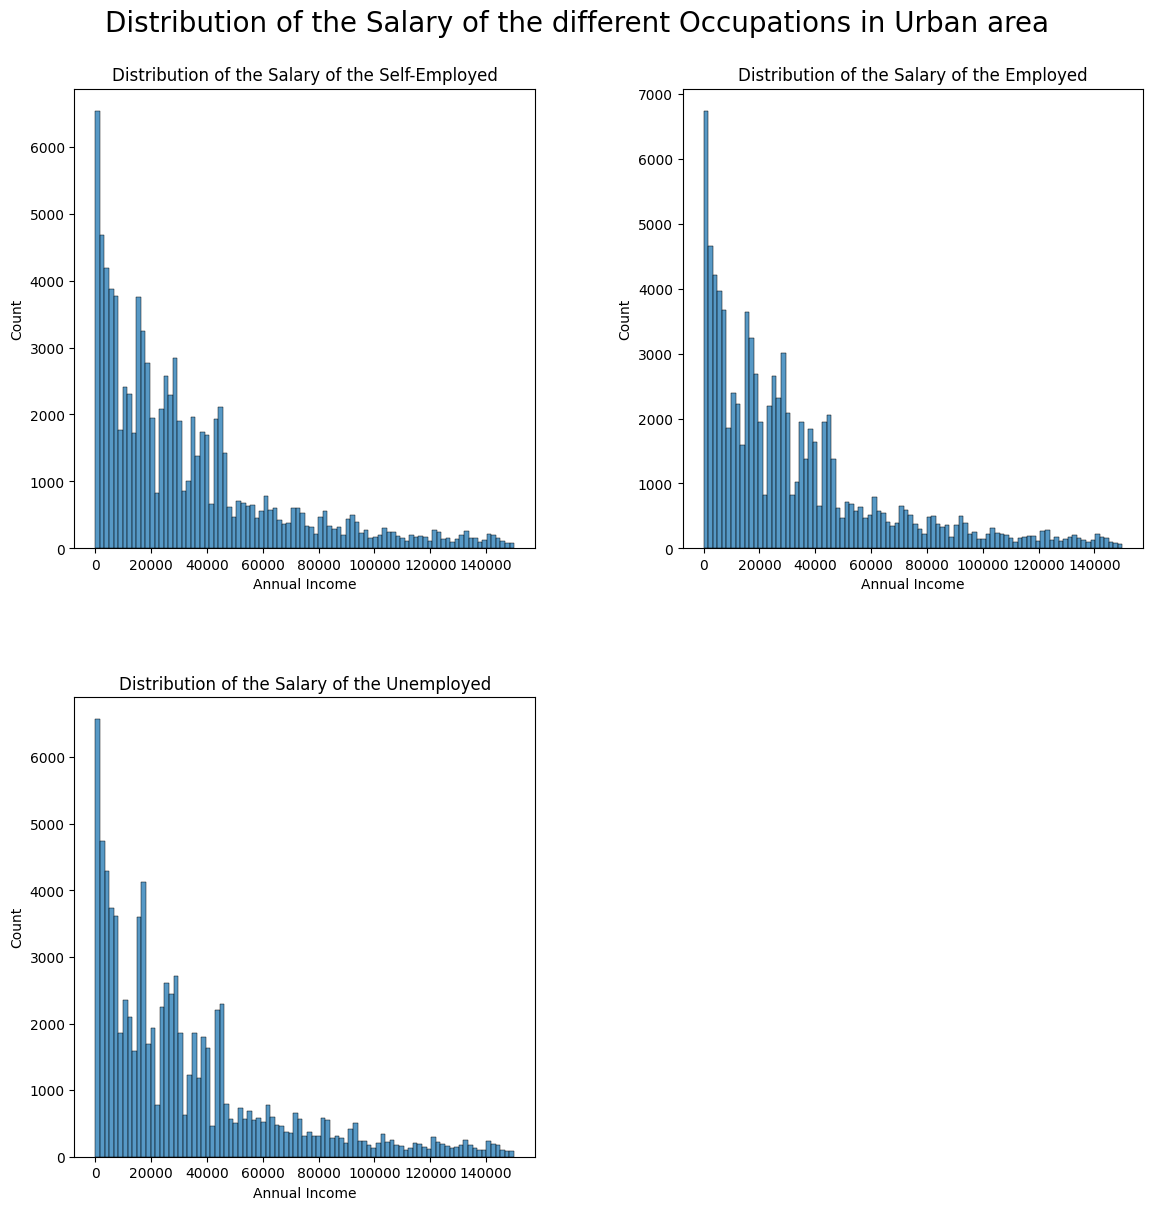

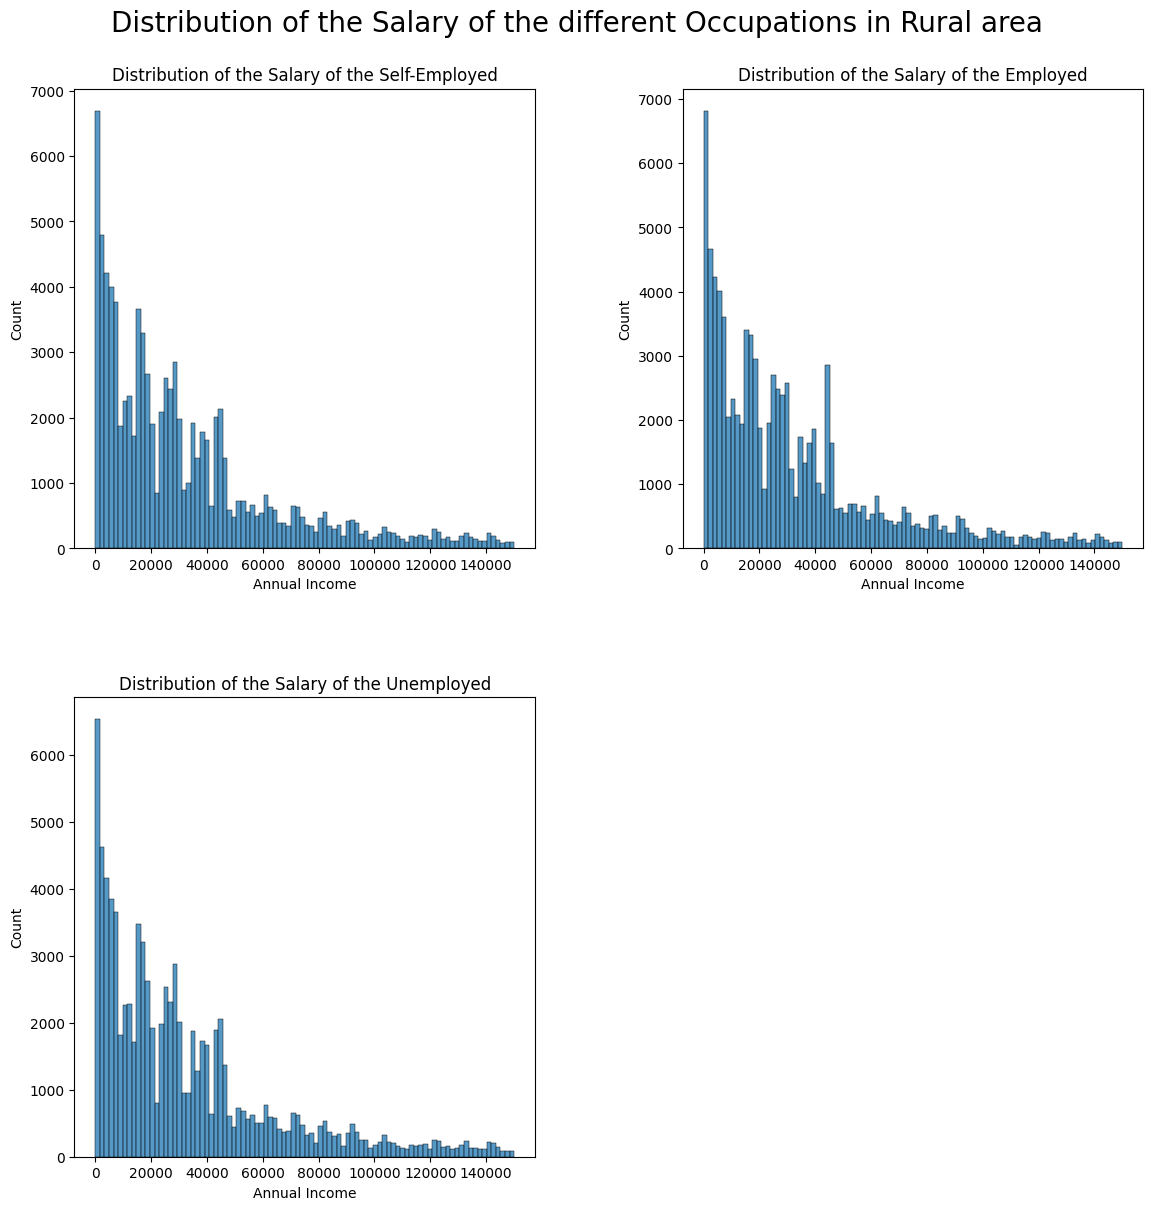

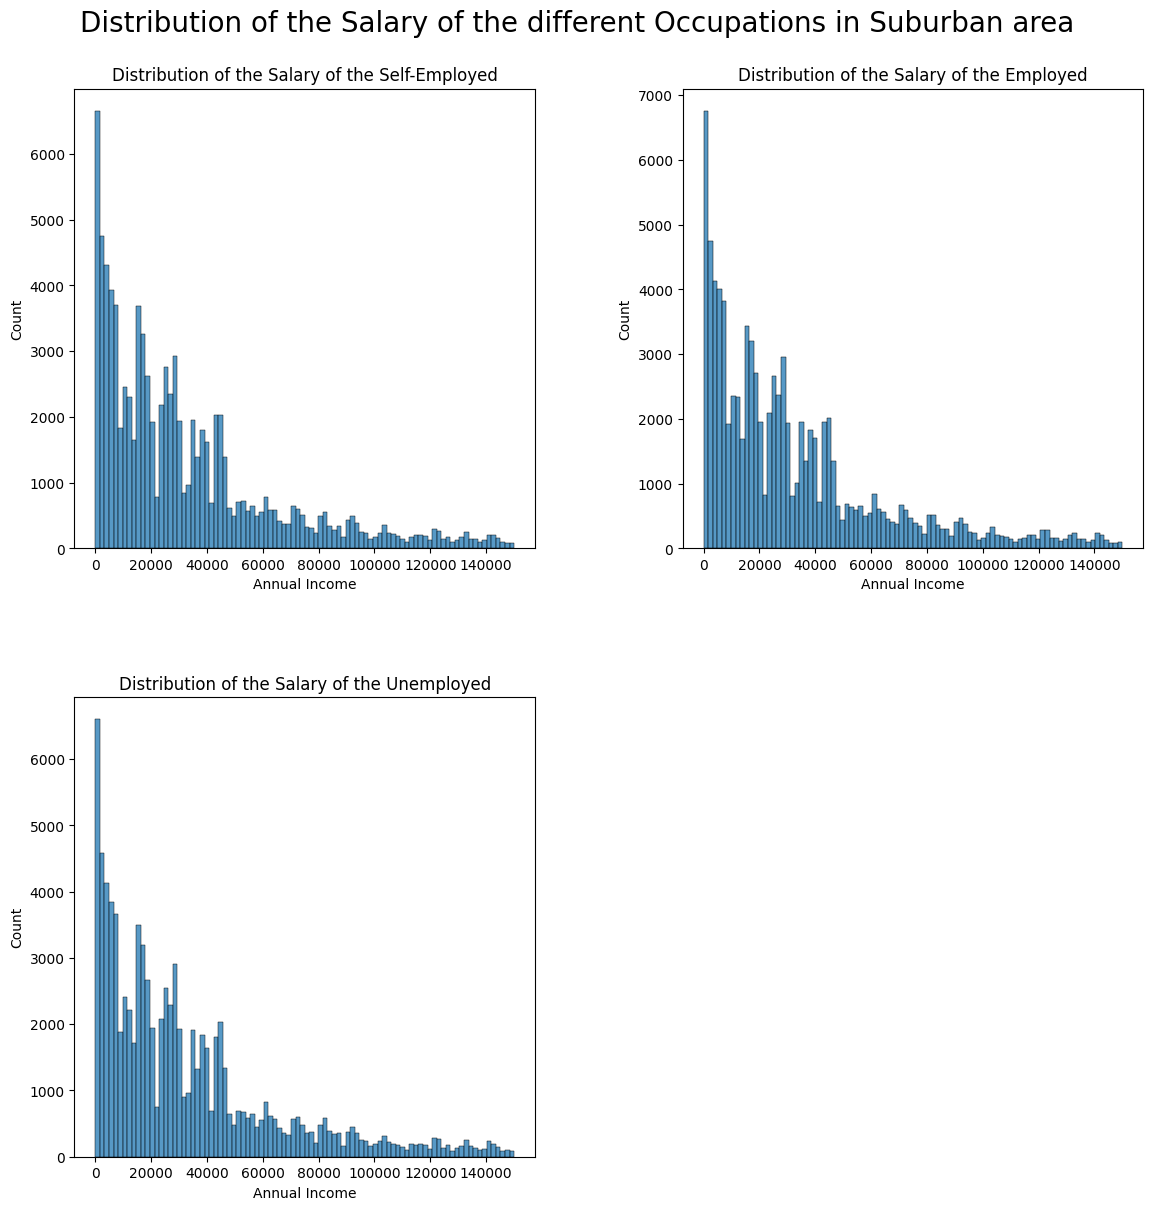

In [81]:
occupation_labels = ["Self-Employed", "Employed", "Unemployed"]
location_labels = train["Location"].unique().tolist()
for label in location_labels:
    plt.figure(figsize=(13, 13))
    for i in range(1, 4):
        occupation = occupation_labels[i-1]
        plt.subplot(2, 2, i)
        sns.histplot(train.query(f"Occupation == '{occupation}' and Location == '{label}'"), x="Annual Income")
        plt.title(f"Distribution of the Salary of the {occupation}")
        plt.tight_layout(pad=6)
    plt.suptitle(f"Distribution of the Salary of the different Occupations in {label} area", fontsize=20, fontdict={"fontweight": "bold"})
    plt.show()

Per my knowledge unemployed people are not likely to have an income in the first place. But this distribution shows otherwise.

The null values of the occupation would be replaced with 'Unknown'

In [82]:
train["Occupation"].fillna("Unknown", inplace=True)


C:\Users\Philemon\AppData\Local\Temp\ipykernel_2692\3295658180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Occupation"].fillna("Unknown", inplace=True)


Getting rid of the outliers in the `Annual Income` column

In [83]:
train = train[train["Annual Income"] < deviation]

In [84]:
for column in train.columns:
    if train[column].dtype == "object":
        train[column] = train[column].fillna(train[column].mode()[0])
    else:
        train[column] = train[column].fillna(train[column].mean())

In [85]:
train.isnull().sum()/train.shape[0] * 100

id                      0.0
Age                     0.0
Gender                  0.0
Annual Income           0.0
Marital Status          0.0
Number of Dependents    0.0
Education Level         0.0
Occupation              0.0
Health Score            0.0
Location                0.0
Policy Type             0.0
Previous Claims         0.0
Vehicle Age             0.0
Credit Score            0.0
Insurance Duration      0.0
Policy Start Date       0.0
Customer Feedback       0.0
Smoking Status          0.0
Exercise Frequency      0.0
Property Type           0.0
Premium Amount          0.0
dtype: float64

In [86]:
train["Policy Start Date"] = train["Policy Start Date"].astype("datetime64[ns]")
test["Policy Start Date"] = test["Policy Start Date"].astype("datetime64[ns]")


In [87]:
train["Policy Start Date"].head(1)

0   2023-12-23 15:21:39.134960
Name: Policy Start Date, dtype: datetime64[ns]

In [88]:
train["Policy Year"] = train["Policy Start Date"].dt.year.astype(float)
train["Policy Month"] = train["Policy Start Date"].dt.month.astype(float)
train["Policy Day"] = train["Policy Start Date"].dt.day.astype(float)
train["Policy Hour"] = train["Policy Start Date"].dt.hour.astype(float)
train["Policy Minute"] = train["Policy Start Date"].dt.minute.astype(float)
train["Policy Second"] = train["Policy Start Date"].dt.second.astype(float)
test["Policy Year"] = test["Policy Start Date"].dt.year.astype(float)
test["Policy Month"] = test["Policy Start Date"].dt.month.astype(float)
test["Policy Day"] = test["Policy Start Date"].dt.day.astype(float)
test["Policy Hour"] = test["Policy Start Date"].dt.hour.astype(float)
test["Policy Minute"] = test["Policy Start Date"].dt.minute.astype(float)
test["Policy Second"] = test["Policy Start Date"].dt.second.astype(float)


In [89]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Year,Policy Month,Policy Day,Policy Hour,Policy Minute,Policy Second
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,No,Weekly,House,2869.0,2023.0,12.0,23.0,15.0,21.0,39.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Unknown,15.569731,Rural,...,Yes,Monthly,House,1483.0,2023.0,6.0,12.0,15.0,21.0,39.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Yes,Weekly,House,567.0,2023.0,9.0,30.0,15.0,21.0,39.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Yes,Weekly,House,2022.0,2021.0,12.0,1.0,15.0,21.0,39.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,Unknown,33.053198,Urban,...,No,Weekly,House,3202.0,2022.0,5.0,20.0,15.0,21.0,39.0


In [90]:
test.isnull().sum()/test.shape[0] * 100

id                       0.000000
Age                      1.561125
Gender                   0.000000
Annual Income            3.732500
Marital Status           1.542000
Number of Dependents     9.141250
Education Level          0.000000
Occupation              29.890625
Health Score             6.181125
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.350250
Vehicle Age              0.000375
Credit Score            11.431375
Insurance Duration       0.000250
Policy Start Date        0.000000
Customer Feedback        6.534500
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Policy Year              0.000000
Policy Month             0.000000
Policy Day               0.000000
Policy Hour              0.000000
Policy Minute            0.000000
Policy Second            0.000000
dtype: float64

In [91]:
for column in test.columns:
    if column == "Occupation":
        test[column] = test[column].fillna("Unknown")
    elif test[column].dtype == "object":
        test[column] = test[column].fillna(test[column].mode()[0])
    else:
        test[column] = test[column].fillna(test[column].mean())

# Model building

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Encoding

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1083326 entries, 0 to 1199997
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1083326 non-null  int64         
 1   Age                   1083326 non-null  float64       
 2   Gender                1083326 non-null  object        
 3   Annual Income         1083326 non-null  float64       
 4   Marital Status        1083326 non-null  object        
 5   Number of Dependents  1083326 non-null  float64       
 6   Education Level       1083326 non-null  object        
 7   Occupation            1083326 non-null  object        
 8   Health Score          1083326 non-null  float64       
 9   Location              1083326 non-null  object        
 10  Policy Type           1083326 non-null  object        
 11  Previous Claims       1083326 non-null  float64       
 12  Vehicle Age           1083326 non-null  float64

Will use ordinal Encoding for the ones that should have a specific order.
One hot encoding for the ones that are completely categorical.
And label encoding for the ones that are ordinal but not in a specific order.

In [95]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
def ordinal_encode(df:pd.DataFrame, column: str, order: list):
    encoder = OrdinalEncoder(categories=[order])
    df[column] = encoder.fit_transform(df[column].values.reshape(-1, 1))
    return df

def one_hot_encode(df:pd.DataFrame, column: str):
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(df[column].values.reshape(-1, 1)).toarray()
    encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
    df = pd.concat([df, encoded], axis=1).drop(columns=column)
    return df

def label_encode(df:pd.DataFrame, columns: list):
    encoder = LabelEncoder()
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

In [94]:
for column in train.select_dtypes("object").columns:
    if train[column].dtype == "object":
        print(f"{column}: {train[column].unique()}")

Gender: ['Female' 'Male']
Marital Status: ['Married' 'Divorced' 'Single']
Education Level: ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation: ['Self-Employed' 'Unknown' 'Employed' 'Unemployed']
Location: ['Urban' 'Rural' 'Suburban']
Policy Type: ['Premium' 'Comprehensive' 'Basic']
Customer Feedback: ['Poor' 'Average' 'Good']
Smoking Status: ['No' 'Yes']
Exercise Frequency: ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type: ['House' 'Condo' 'Apartment']


In [96]:
ordinals = {"Education Level": ["High School", "Bachelor's", "Master's",  "PhD"],
            "Policy Type": ["Basic", "Comprehensive", "Premium" ],
            "Customer Feedback": ["Poor", "Average", "Good"],
            "Exercise Frequency": ["Rarely", "Monthly", "Weekly", "Daily"]}

hot = ["Marital Status", "Property Type", "Location", "Occupation"]

label = ["Gender", "Smoking Status"]


In [97]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
for column, order in ordinals.items():
    ordinal_encode(train, column, order)
    ordinal_encode(test, column, order)
for column in hot:
    train = one_hot_encode(train, column)
    test = one_hot_encode(test, column)
label_encode(train, label)
label_encode(test, label)

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,...,x0_Apartment,x0_Condo,x0_House,x0_Rural,x0_Suburban,x0_Urban,x0_Employed,x0_Self-Employed,x0_Unemployed,x0_Unknown
0,1200000,28.00000,0,2310.0,4.0,1.0,7.657981,0.0,1.004873,19.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1200001,31.00000,0,126031.0,2.0,2.0,13.381379,2.0,1.004873,14.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1200002,47.00000,0,17092.0,0.0,3.0,24.354527,1.0,1.004873,16.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1200003,28.00000,0,30424.0,3.0,3.0,5.136225,1.0,1.000000,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1200004,24.00000,1,10863.0,2.0,0.0,11.844155,2.0,1.004873,14.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.00000,0,38782.0,1.0,1.0,14.498639,2.0,1.004873,8.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
799996,1999996,41.13644,0,73462.0,0.0,2.0,8.145748,0.0,2.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
799997,1999997,26.00000,0,35178.0,0.0,2.0,6.636583,1.0,1.004873,10.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
799998,1999998,34.00000,0,45661.0,3.0,2.0,15.937248,2.0,2.000000,17.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [98]:
print(train.columns)
print(test.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Education Level', 'Health Score', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Premium Amount', 'Policy Year', 'Policy Month',
       'Policy Day', 'Policy Hour', 'Policy Minute', 'Policy Second',
       'x0_Divorced', 'x0_Married', 'x0_Single', 'x0_Apartment', 'x0_Condo',
       'x0_House', 'x0_Rural', 'x0_Suburban', 'x0_Urban', 'x0_Employed',
       'x0_Self-Employed', 'x0_Unemployed', 'x0_Unknown'],
      dtype='object')
Index(['id', 'Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Education Level', 'Health Score', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Policy Year', 'Policy Month', 'Policy Day',

In [44]:
x = train.drop(columns=["Premium Amount", "Policy Start Date", "id"])
y = train["Premium Amount"]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [46]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [101]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error, root_mean_squared_log_error

In [100]:
mse = mean_squared_error(y_test, model.predict(x_test))
r2 = r2_score(y_test, model.predict(x_test))
mae = mean_absolute_error(y_test, model.predict(x_test))
rmse = root_mean_squared_error(y_test, model.predict(x_test))
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 703835.5932653468
R2 Score: 0.015728000520417784
Mean Absolute Error: 645.655542078591
Root Mean Squared Error: 838.9491005212097


In [102]:
rmsle = root_mean_squared_log_error(y_test, model.predict(x_test))
print(f"Root Mean Squared Log Error: {rmsle}")

Root Mean Squared Log Error: 1.1328889861409572


Submission

In [ ]:
model = RandomForestRegressor()
model.fit(x, y)

In [104]:
final = model.predict(test.drop(columns=["Policy Start Date", "id"]))
sample["Premium Amount"] = final

In [105]:
sample.to_csv("submission.csv", index=False)